I have the data that I am going to load and start visualising to solve my initial problem Credit Card Fraud. in the previous step, I worked on cleaning data, checked for missing values and took care of the outlaiers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
df = pd.read_csv(r"preprocessed_data2.csv")
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day,year,month
0,2019-09-14 03:29:08,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,"Accountant, chartered",83,66a15820cdae4179f0b26819babd4eb3,33.283670,-118.654974,1,Sat,2019,9
1,2020-01-22 06:51:03,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,Cartographer,59,a78de0cd54f3d932607fb930f3293610,45.456663,-116.555030,0,Wed,2020,1
2,2019-01-27 23:12:15,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,Marketing executive,32,527fdf7cc53f7af2e820b8b6e3d2f595,34.922036,-113.901876,1,Sun,2019,1
3,2020-02-23 14:41:52,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",51,2576de962e18a80ce49c97b63da91f43,42.557041,-96.231715,0,Sun,2020,2
4,2020-02-23 23:21:29,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,Metallurgist,49,cfa8f4168b3f3e03ed2b4b4e3bb5d494,42.175045,-97.983932,1,Sun,2020,2


In [3]:
#After loading my data, it is alwayes good to learn about data first.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  3564 non-null   object 
 1   merchant               3564 non-null   object 
 2   category               3564 non-null   object 
 3   amt                    3564 non-null   float64
 4   city                   3564 non-null   object 
 5   state                  3564 non-null   object 
 6   lat                    3564 non-null   float64
 7   long                   3564 non-null   float64
 8   city_pop               3564 non-null   int64  
 9   job                    3564 non-null   object 
 10  age                    3564 non-null   int64  
 11  trans_num              3564 non-null   object 
 12  merch_lat              3564 non-null   float64
 13  merch_long             3564 non-null   float64
 14  is_fraud               3564 non-null   int64  
 15  day 

In [4]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
age                        int64
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
day                       object
year                       int64
month                      int64
dtype: object

In [5]:
#change 'trans_date_trans_time' column to date time format.
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
age                               int64
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
day                              object
year                              int64
month                             int64
dtype: object

In [6]:
#Describe() funection is pretty informative, as we can see:
#I have the count even for all of my numeric columns
#mean of each column
#min and max for each column
df.describe()

,trans_date_trans_time,amt,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,year,month
count,3564,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.00000,3564.000000,3564.000000
mean,2019-12-27 12:01:39.398428672,242.074364,39.213289,-112.059362,57369.034512,54.425365,39.185882,-112.119199,0.50000,2019.468575,6.733726
min,2019-01-01 00:22:36,1.050000,20.027100,-165.672300,46.000000,23.000000,19.078440,-166.651656,0.00000,2019.000000,1.000000
25%,2019-07-03 23:32:51,19.827500,36.715400,-120.646600,509.000000,40.000000,36.724523,-120.498411,0.00000,2019.000000,4.000000
50%,2019-12-19 17:30:01.500000,90.837500,39.741700,-111.794100,1645.000000,52.000000,39.682058,-111.422651,0.50000,2019.000000,7.000000
75%,2020-06-23 19:43:31.500000,319.897500,41.540300,-104.660000,18408.000000,67.000000,41.578404,-104.625485,1.00000,2020.000000,10.000000
max,2020-12-31 20:48:16,1026.880000,47.663300,-91.768900,841711.000000,97.000000,47.942606,-91.873612,1.00000,2020.000000,12.000000
std,NaN,312.317047,4.212164,12.585936,154730.564554,17.919732,4.247595,12.557949,0.50007,0.499081,3.457951


In [7]:
#I did value count for the categorical columns.
cate_var = ['merchant', 'category']
for col in cate_var:
    print(df[col].value_counts())

merchant
Romaguera, Cruickshank and Greenholt    24
Kiehn-Emmerich                          22
Kerluke-Abshire                         21
Kilback LLC                             20
McDermott-Weimann                       19
                                        ..
Rutherford, Homenick and Bergstrom       1
Hartmann, Rowe and Hermann               1
Hoppe, Harris and Bedn                   1
Bins-Tillman                             1
Smitham-Schille                          1
Name: count, Length: 665, dtype: int64
category
grocery_pos       596
shopping_net      535
shopping_pos      344
gas_transport     326
misc_net          312
home              223
kids_pets         217
personal_care     193
entertainment     189
food_dining       163
health_fitness    152
misc_pos          141
grocery_net        93
travel             80
Name: count, dtype: int64


C:\Users\mutha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


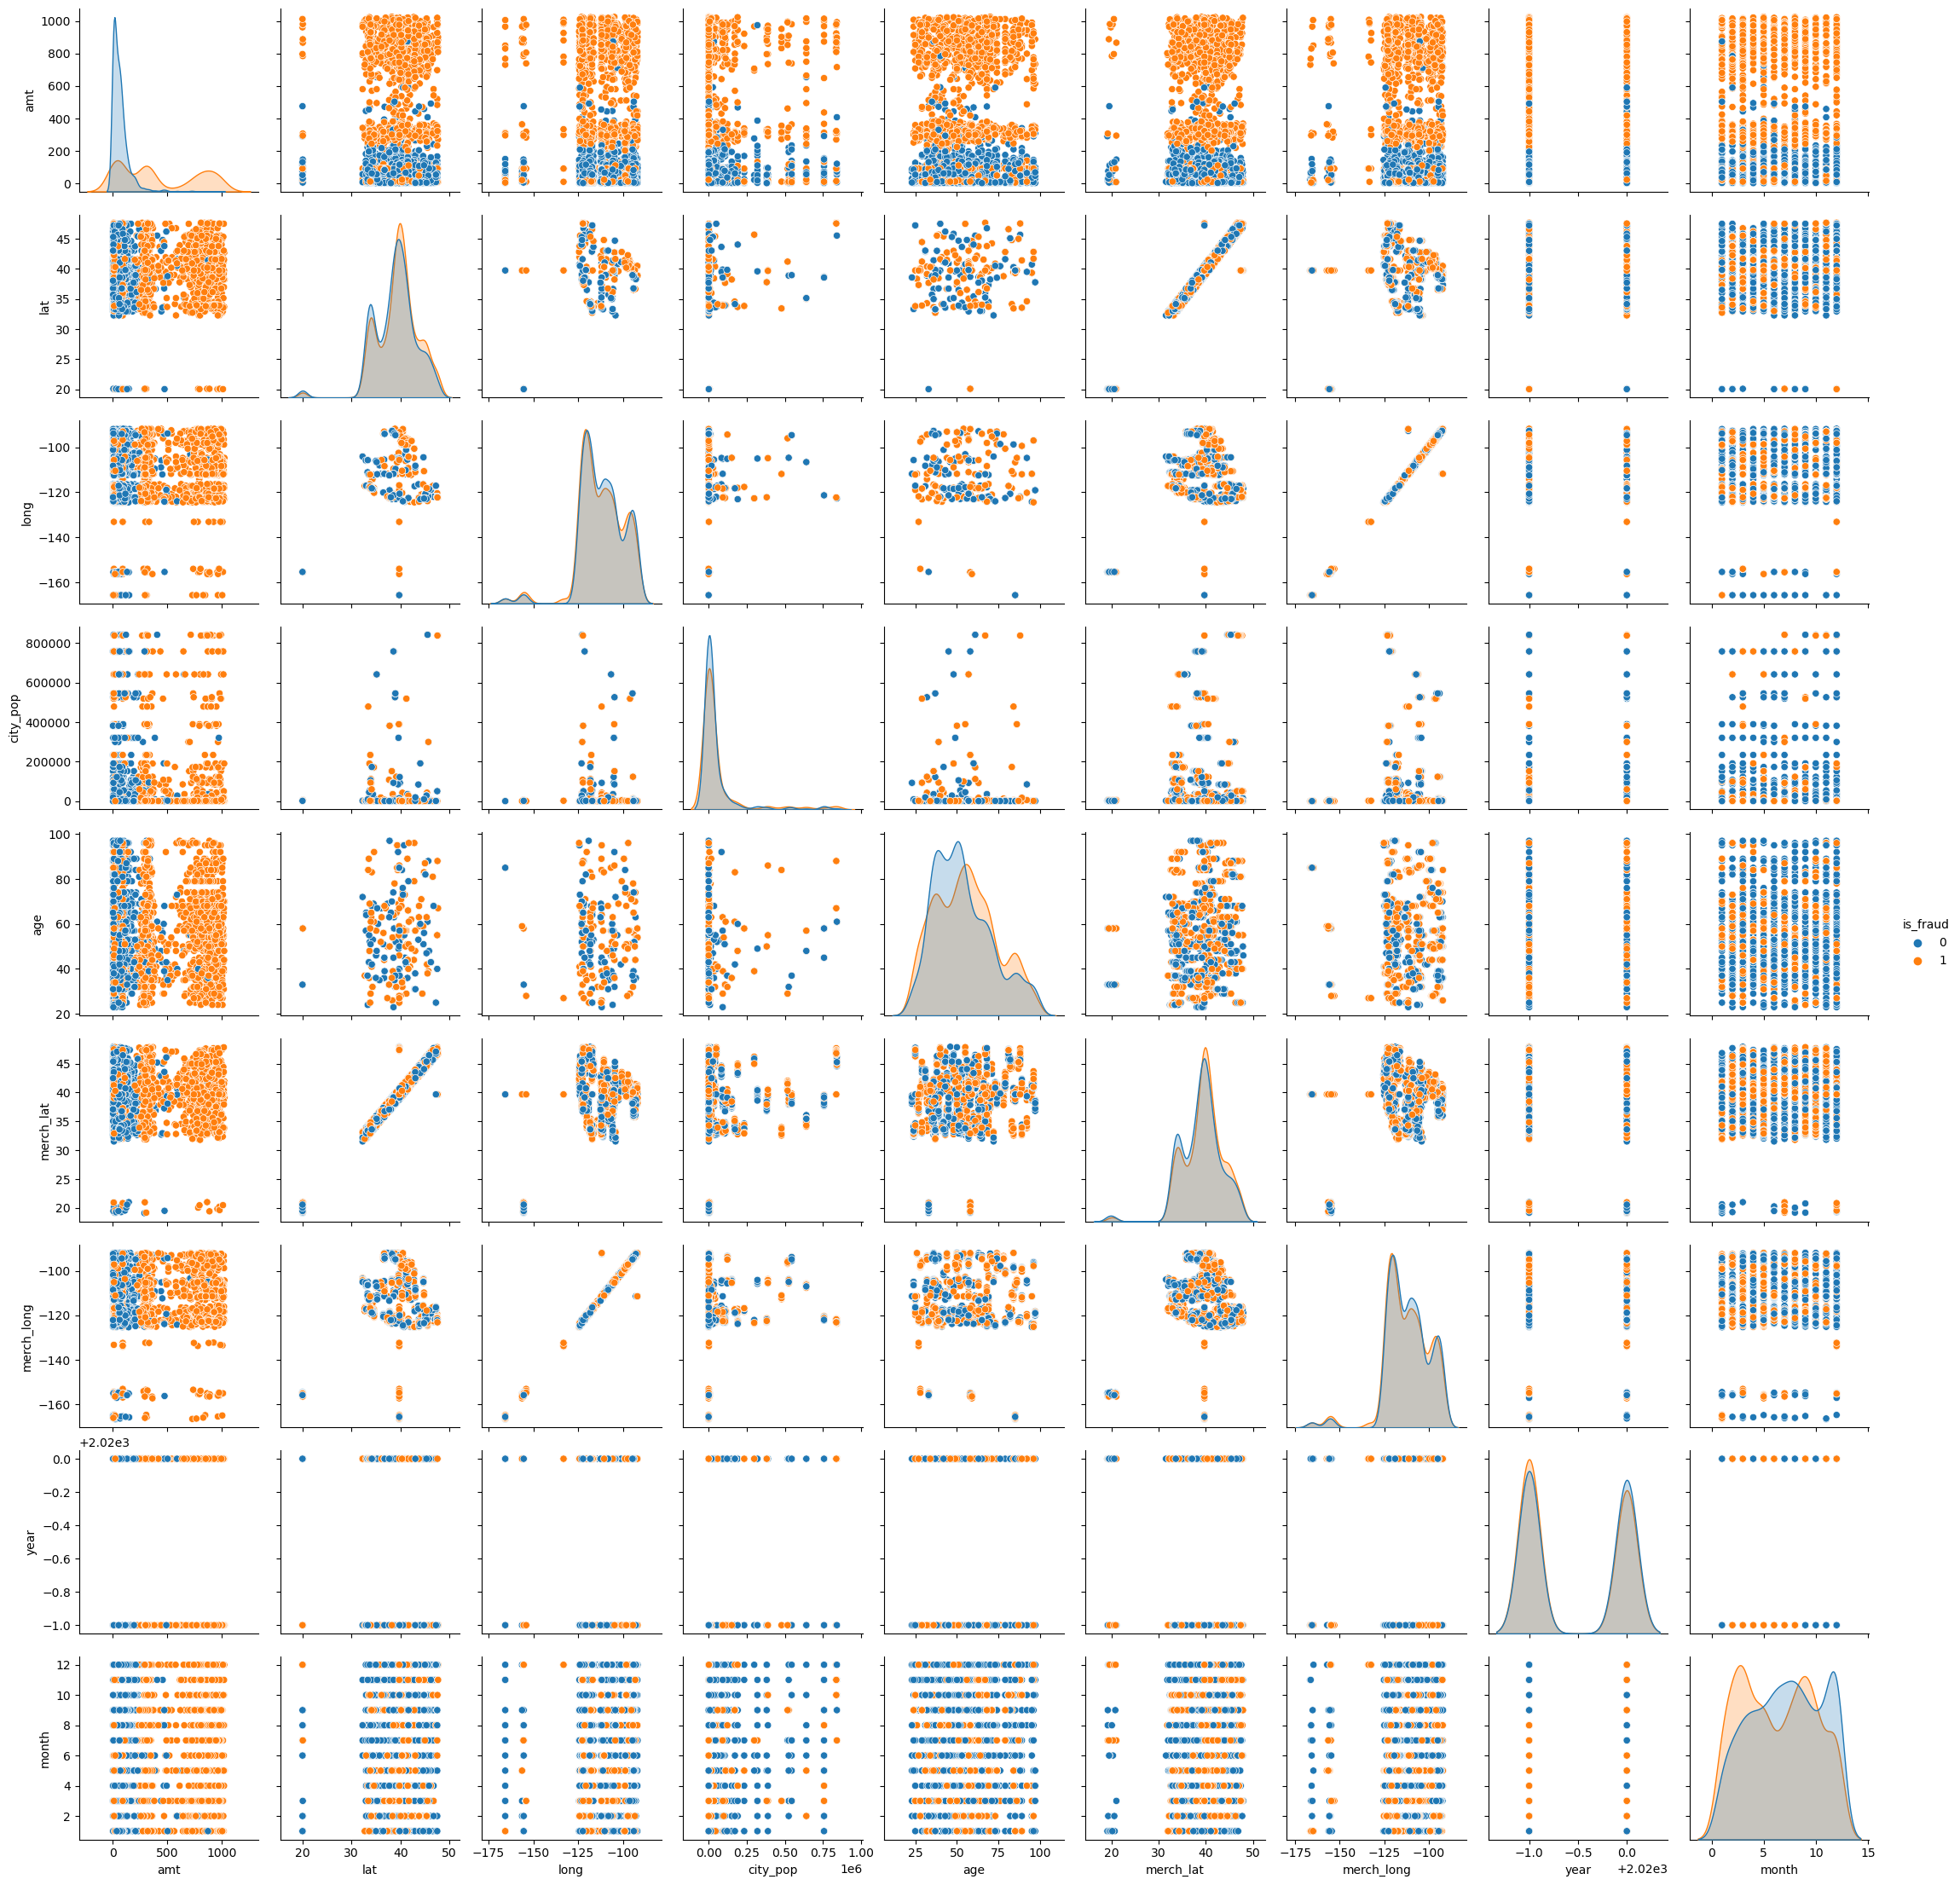

In [8]:
# Now I like to pairplot data first to gain an overview of the dataset's distributions and correlations
sns.pairplot(df, hue='is_fraud')

[Text(0, 0.5, 'amt'),
 Text(0, 1.5, 'lat'),
 Text(0, 2.5, 'long'),
 Text(0, 3.5, 'city_pop'),
 Text(0, 4.5, 'age'),
 Text(0, 5.5, 'merch_lat'),
 Text(0, 6.5, 'merch_long'),
 Text(0, 7.5, 'is_fraud'),
 Text(0, 8.5, 'year'),
 Text(0, 9.5, 'month')]

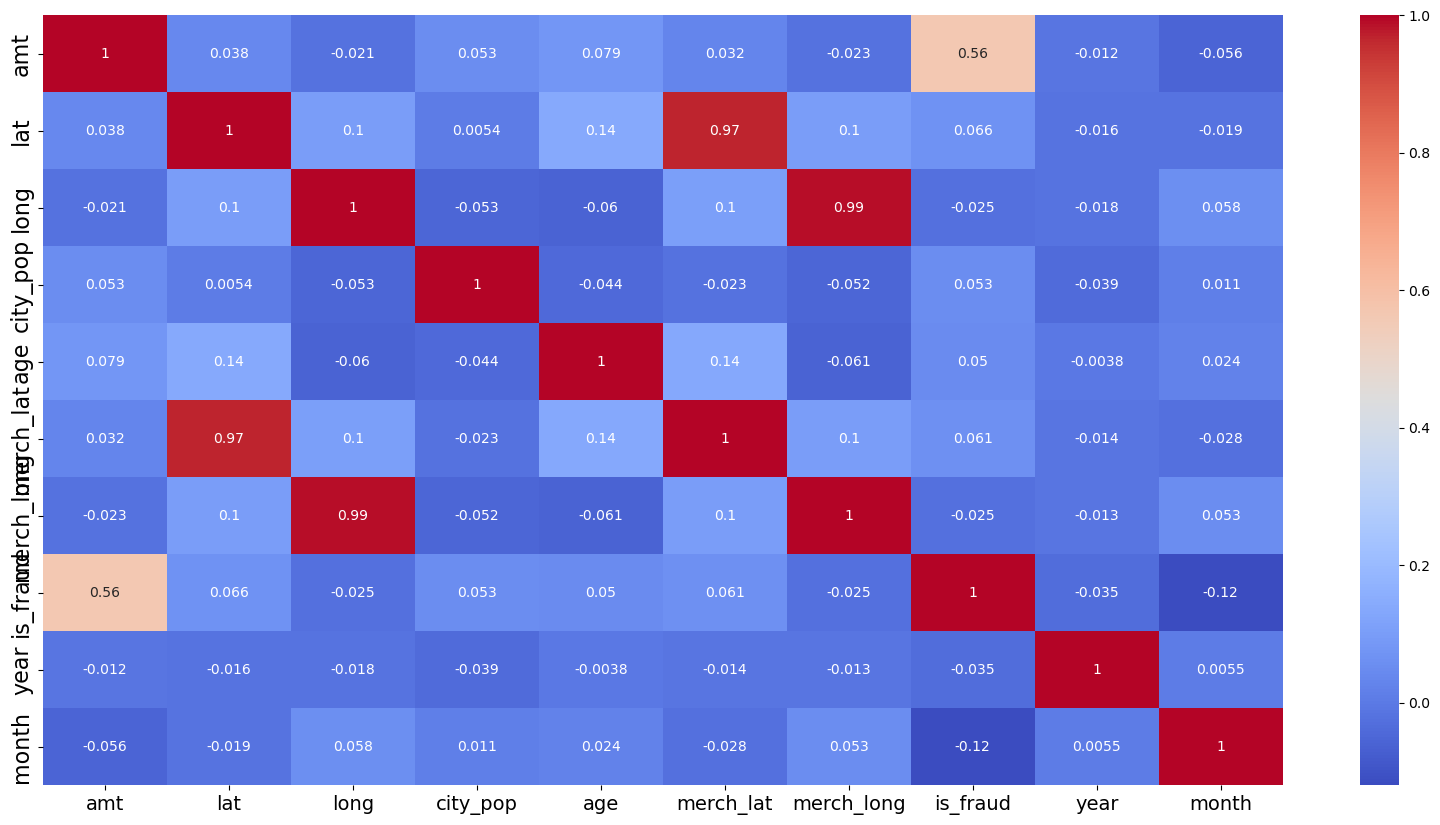

In [10]:
# For an even better correlations viwe I use heatmap
plt.figure(figsize=(20,10))
coolwarm_cmap = sns.color_palette("coolwarm", as_cmap=True)
heatmap = sns.heatmap(df[['amt', 'lat', 'long', 'city_pop', 'age', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month']].corr(), annot=True, cmap=coolwarm_cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

<Axes: xlabel='is_fraud', ylabel='amt'>

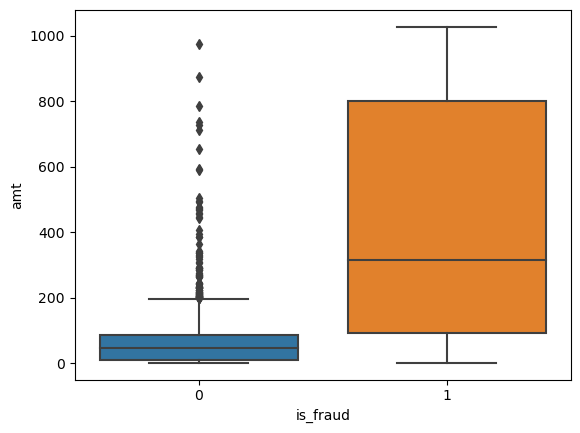

In [11]:
sns.boxplot(x='is_fraud', y='amt', data=df)

The significant difference in transaction amounts between fraudulent and non-fraudulent transactions could indicate that fraudsters tend to target transactions with specific amounts.

The presence of a high range of outliers in non-fraudulent transactions suggests that there are occasional transactions with unusually high or low amounts within the legitimate transaction data. This could be due to a variety of factors, such as large one-time purchases, errors in data entry, or special promotions.

<Axes: xlabel='is_fraud', ylabel='city_pop'>

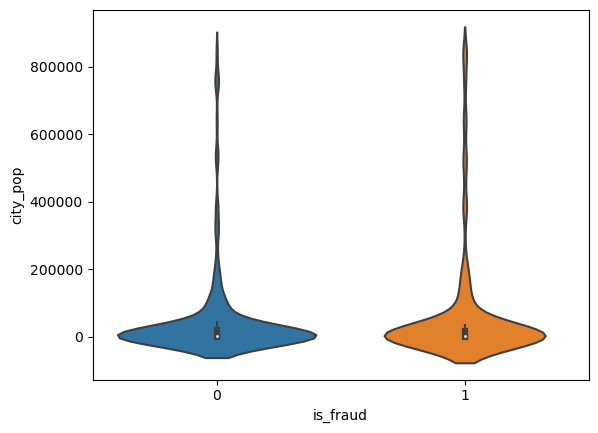

In [12]:
sns.violinplot(x='is_fraud', y='city_pop', data=df)

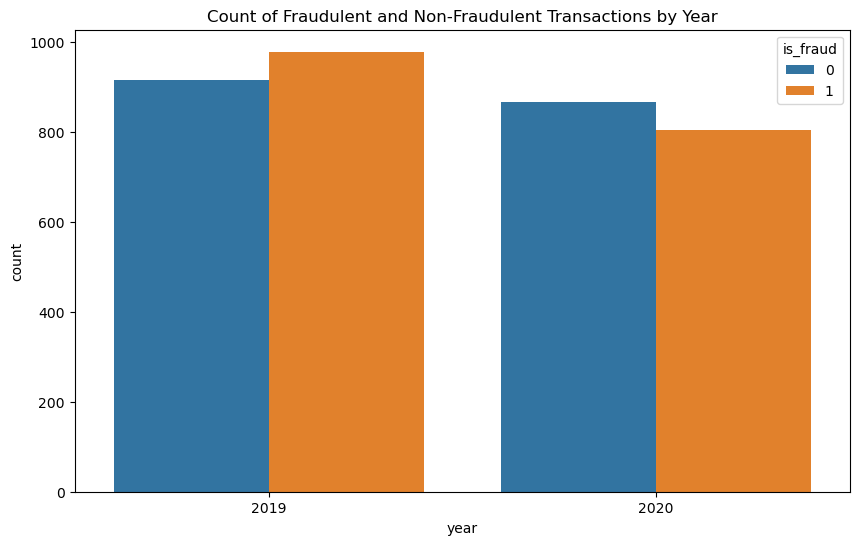

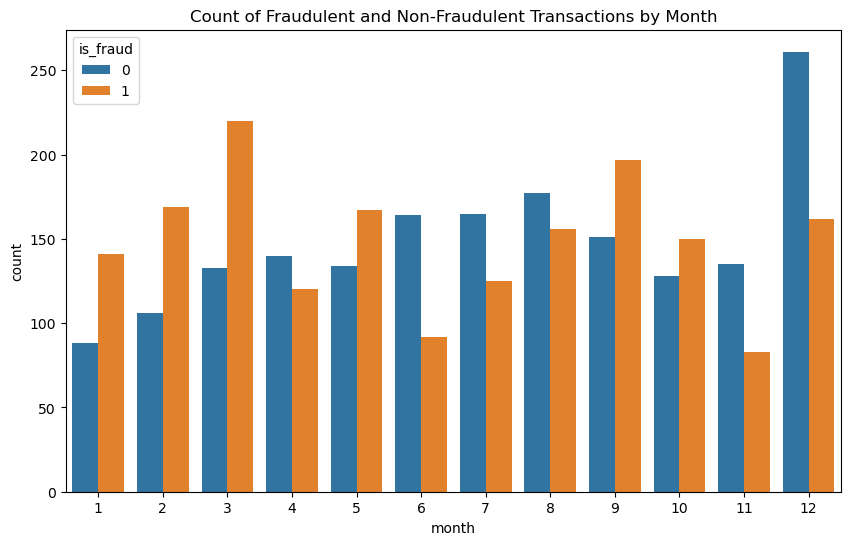

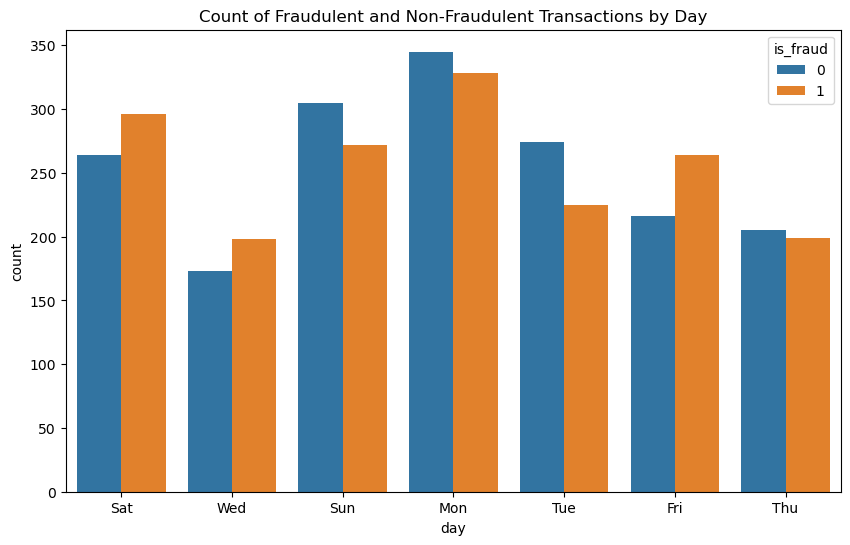

In [13]:
# Let's visualise the count of Fraudulent and Non-Fraudulent Transactions by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Year')
plt.show()
# Visualise the count of Fraudulent and Non-Fraudulent Transactions by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Month')
plt.show()
# Visualise the count of Fraudulent and Non-Fraudulent Transactions by Day
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Day')
plt.show()

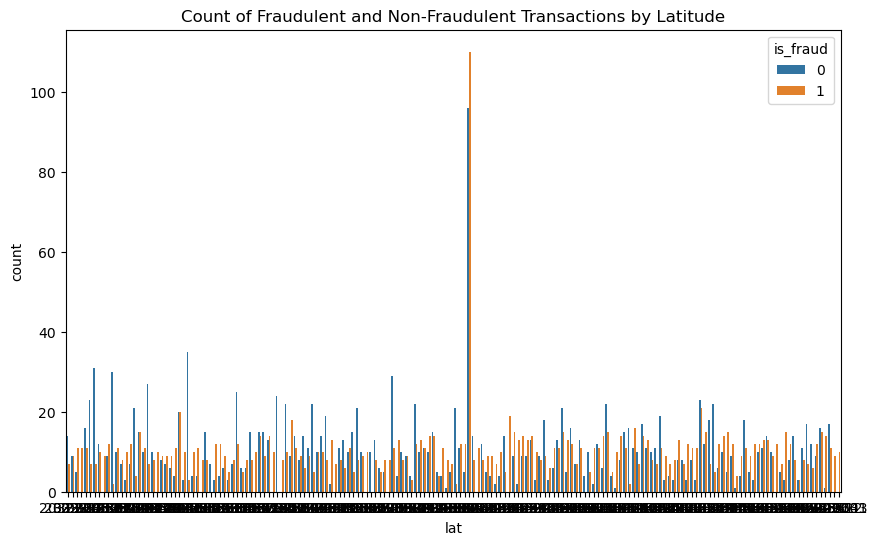

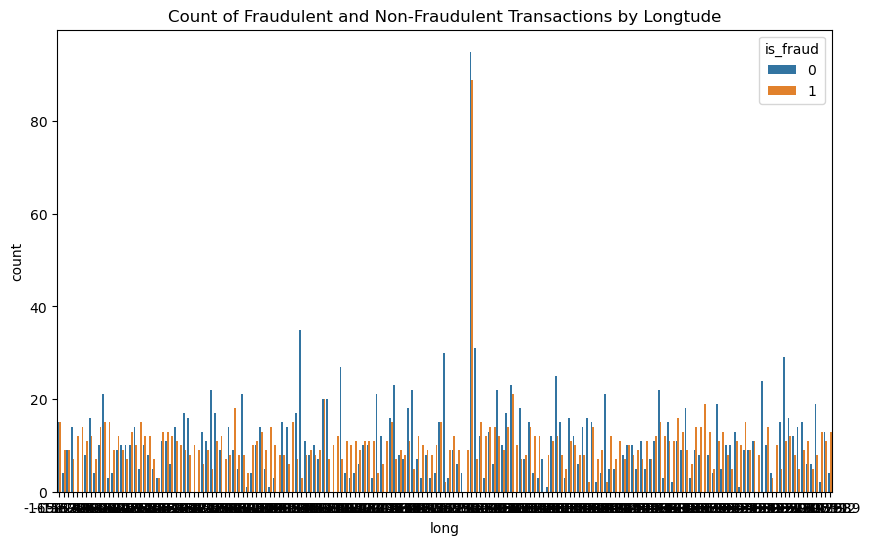

In [14]:
# Visualising the Fraudulent and Non-Fraudulent Transactions by Latitude
plt.figure(figsize=(10, 6))
sns.countplot(x='lat', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Latitude')
plt.show()

# Visualising the Fraudulent and Non-Fraudulent Transactions by Longtude
plt.figure(figsize=(10, 6))
sns.countplot(x='long', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Longtude')
plt.show()

#Model

Since fraud detection is a classification question, Logistic Regression is the primary regression option to be chosen

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
#we saw in the heat map above the highest correlation was between 'amt' and 'is_fraud' columns
#First model is going to featuer 'amt' column and target 'is_fraud'
X = df[['amt']]
y = df['is_fraud']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initiate regressor
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7952314165497896


In [21]:
X = df[['city_pop']]
y = df['is_fraud']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initiate regressor
model2 = LogisticRegression()

# Fitting the model
model2.fit(X_train, y_train)

# Prediction
y_pred = model2.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.47685834502103785


In [25]:
X = df[['age']]
y = df['is_fraud']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initiate regressor
model3 = LogisticRegression()

# Fitting the model
model3.fit(X_train, y_train)

# Prediction
y_pred = model3.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5469845722300141


In [26]:
X = df[['month']]
y = df['is_fraud']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initiate regressor
model4 = LogisticRegression()

# Fitting the model
model4.fit(X_train, y_train)

# Prediction
y_pred = model4.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5301542776998598


In [27]:
X = df[['year']]
y = df['is_fraud']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initiate regressor
model5 = LogisticRegression()

# Fitting the model
model5.fit(X_train, y_train)

# Prediction
y_pred = model5.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.47685834502103785


#Conclusion:

I performed multiple visual statistics on the data to learn about the data distributions and correlations.

I build and tested 5 models all of them were logistic models, Model one came up with the highest accuracy rate of 79% followed by Model three with an accuracy rate of 54% 